# Załadowanie potrzebnych bibliotek
Importuj niezbędne biblioteki, w tym TensorFlow, Keras, NumPy, Matplotlib i inne.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Załadowanie danych
Załaduj dane obrazowe z odpowiedniego źródła, np. z lokalnego katalogu lub z internetu.

In [26]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# Przygotowanie danych
Przygotuj dane do trenowania modelu, w tym podział na zestawy treningowe i testowe oraz normalizację obrazów.

In [27]:
# Przygotowanie danych z augmentacją
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Wizualizacja danych
Utwórz kilka wizualizacji, aby lepiej zrozumieć dane obrazowe, np. wyświetl kilka przykładowych obrazów.

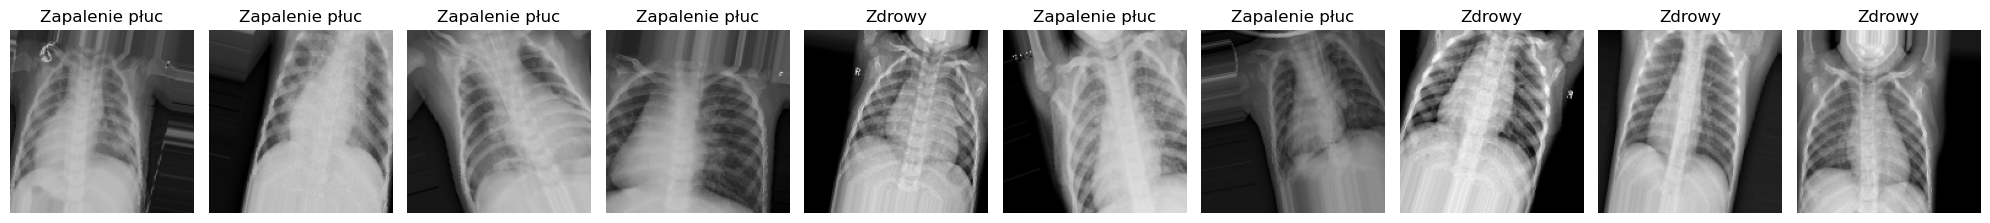

In [28]:
# Wizualizacja danych
def plot_images(images_arr, labels_arr, class_names):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[int(label)])
    plt.tight_layout()
    plt.show()

class_names = ['Zdrowy', 'Zapalenie płuc']
sample_training_images, sample_training_labels = next(train_generator)
plot_images(sample_training_images[:10], sample_training_labels[:10], class_names)


# Budowanie modelu sieci konwolucyjnej
Zbuduj model sieci konwolucyjnej przy użyciu Keras, definiując warstwy konwolucyjne, poolingowe i gęste.

In [ ]:
# Budowanie modelu sieci konwolucyjnej
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie modelu
Trenuj model na przygotowanych danych treningowych, określając liczbę epok, batch size i inne hiperparametry.

In [34]:
# Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=2,
    callbacks=[early_stopping]
)

Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 525ms/step - accuracy: 0.7794 - loss: 0.4719 - val_accuracy: 0.7500 - val_loss: 0.6784
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 530ms/step - accuracy: 0.8551 - loss: 0.3392 - val_accuracy: 0.7500 - val_loss: 0.7144


# Wizualizacja wyników trenowania

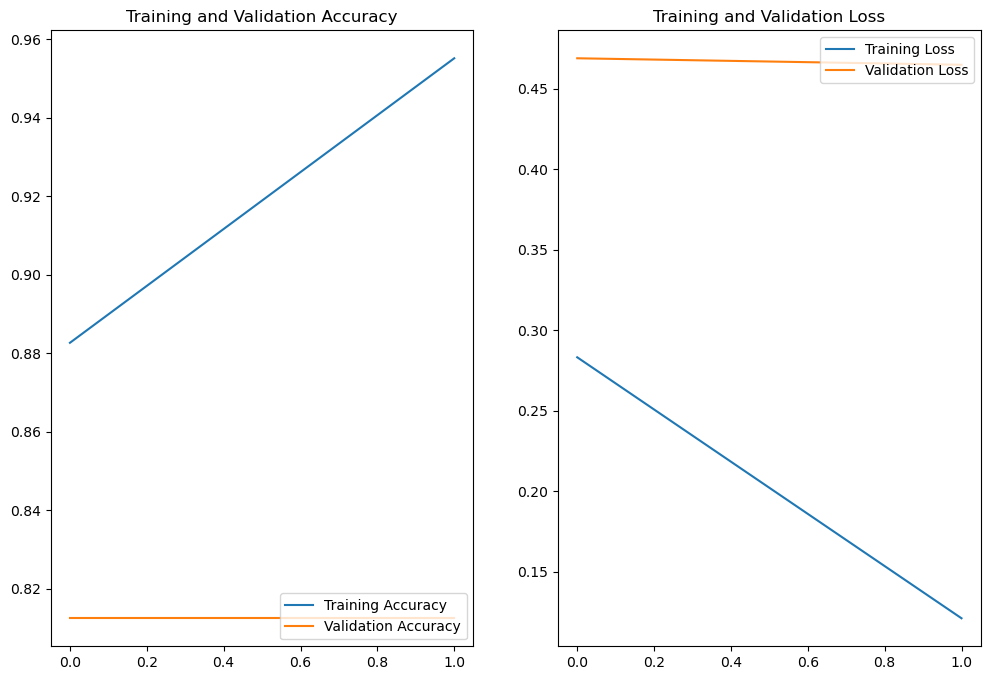

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Ocena modelu
Oceń wydajność modelu na zestawie testowym, obliczając metryki takie jak dokładność, precyzja, czułość i F1-score oraz wyświetlając macierz konfuzji.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# Predykcje na zestawie testowym
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0).flatten()
y_true = test_generator.classes

# Obliczanie metryk oceny
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"Dokładność (Accuracy): {accuracy:.2f}")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.5281 - loss: 1.9157
Test accuracy: 0.75
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step
Dokładność (Accuracy): 0.75
Precyzja (Precision): 0.72
Czułość (Recall): 0.99
F1-score: 0.83


# Macierz konfuzji

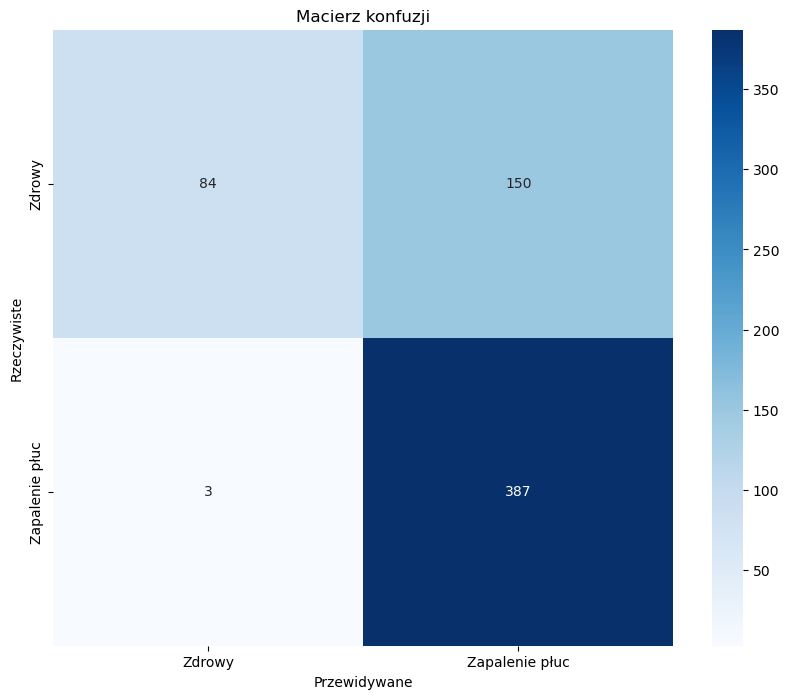

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Zdrowy', 'Zapalenie płuc'], yticklabels=['Zdrowy', 'Zapalenie płuc'])
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title("Macierz konfuzji")
plt.show()